### Loading required liabraries

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as scipy
from scipy.stats import iqr
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

### Loading and creating our Data Frame

In [49]:
df = pd.read_csv("Data/salary.csv")
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


### Examining the data frame

- Get the shape of data frame
- Inspecting for null and/or missing values
- Dealing with missing and/or null values
- Renaming Columns and entries

In [50]:
#Inspecting for null and/or missing values

null_values= df.isnull().sum().sum()
print('Number of missing values is: ',null_values)
null = df[df.salary.isnull()]
null

Number of missing values is:  1


,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


- We have 1 missing value in our salary colunm at index 208

In [51]:
#Dealing with missing and/or null values

df = df.dropna()
df.isnull().sum().sum()

0

- We decided to drop our missing value as it is just one value.

## QUESTION 1

###  Splitting the data set to Training and Testing

In [52]:
train_x, test_x, train_y, test_y = train_test_split(df.yearsworked, df.salary, test_size=0.3, random_state=100)
train_x.head()

475     1
75      5
163    13
160     7
84      7
Name: yearsworked, dtype: int64

- We randomly split our data into training and testing set. Our training  is 70 %  and our test set is 30 % of the original data.

### Examining the data set

In [53]:
# Minimum Salary

print('Our minimum salary is :',train_y.min())

Our minimum salary is : 29000.0


In [54]:
# Computing maximum Salary

print('Our maximum salary is :',train_y.max())

Our maximum salary is : 90082.0


### Checking for extreme values

In [55]:
q75, q25 = np.percentile(train_y, [75 ,25])
iqr = q75 - q25
print('Our interquatile range is :',iqr)

Our interquatile range is : 19900.5


In [56]:
cut_off = iqr * 1.5
cut_off_lower = q25 - cut_off
cut_off_upper = q75 + cut_off

In [57]:
cut_off_upper

90263.25

- This is our upper limit for our salary range and any value greater than this will be classified as an outlier

In [58]:
cut_off_lower

10661.25

- This is our lower limit for our salary range and any value less than this will be classified as an outlier

In [59]:
train_y['outlier_or_not'] = ['lower' if i < cut_off_lower else 'upper' if i > cut_off_upper else 'nothing' for i in train_y]

### Computing outliers beyond the upper limit

In [60]:
x = train_y.outlier_or_not[train_y.outlier_or_not == 'upper']
x

'nothing'

- From these result we can say we dont have  outliers which are greater than the upper limit of the salary range

### Computing outliers bellow the lower limit

In [ ]:
x = train_y.outlier_or_not[train_y.outlier_or_not == 'lower']
x

- From these result we can say we dont have outliers which are lower than the lower limit of the salary range

### Creating a histograms to show the distribution of the variables

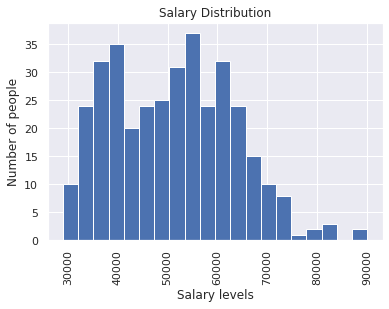

In [29]:
sns.set()
plt.hist(x= train_y, bins=20)
plt.xlabel('Salary levels')
plt.xticks(rotation= 90, horizontalalignment='center')
plt.ylabel('Number of people')
plt.title('Salary Distribution')
plt.show()

- The distribution is skewed to the right

- More people are earning between 35000 to 65000 dollars.

- Only few people earn more than 75000 dollars


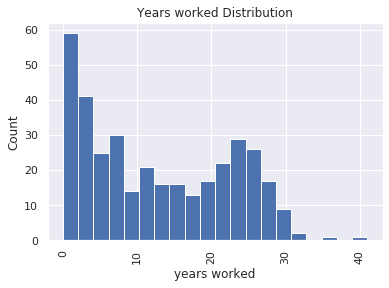

In [30]:
sns.set()
plt.hist(x= train_x, bins=20)
plt.xlabel('years worked')
plt.xticks(rotation= 90, horizontalalignment='center')
plt.ylabel('Count')
plt.title('Years worked Distribution')
plt.show()

- The distribution skewed to the rigth

- Few people have worked beyond 30 years
- We have more people who have 0 to 26 yars work experience 

### Scater plot illustrating the distribution between salary and years worked in our train data frame

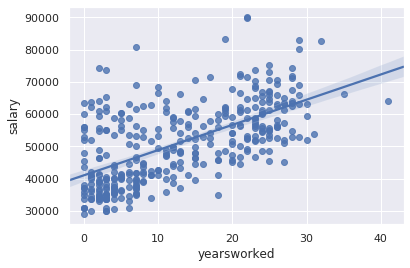

In [31]:
sns.regplot(x= train_x,y=train_y)
plt.show()

- The line of best fit tells us there is a positive correlation between our variables, thus there is a positive relationship between salary and years worked.

- When years worked increases, salary also inceases.

## QUESTION 2

### A simple linear regression for Salary with one predictor variable: Years Worked from our train data.

In [32]:
X = train_x
y = train_y

# Note the difference in argument order
train_x = sm.add_constant(train_x)
test_x = sm.add_constant(test_x)
model = sm.OLS(train_y, train_x).fit()

#model.summary()

/home/recruit/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [34]:
print("The model R^2 is: ",model.rsquared)

print("The model pvalue is: ",model.pvalues)

The model R^2 is:  0.3709540340802603
The model pvalue is:  const          1.946747e-156
yearsworked     8.006063e-38
dtype: float64


- This model has a lower R-squared , which means that this model do not provides a better fit to the train set data. That is because only 38.7 % of the variance in employees’ salaries is accounted for by the number of years they have worked.

- The p-value for yearsworked is far less than 0.05, and so we believe that there is a relationship between years worked and salary. Thus an increase in number of years worked will result in an increase in salary.

## QUESTION 3

### The unstandardized coefficient (B or ‘coef’ in statsmodels) tells us about that relationship between Years Worked and Salary is :

In [35]:
model.params

const          41053.911878
yearsworked      780.431635
dtype: float64

- For every year worked, people get a salary increase of 813.24 a year.

### QUESTION 4

### The 95% confidence intervals [0.025, 0.975] defination

- We are confident that the true value of the population is between the intervals

## QUESTION 5

### The expected salary for someone with 12 years’ work experience.

In [36]:
model.predict([1, 12])

array([50419.09150254])

## QUESTION 6

### Calculate the expected salary for someone with 80 years’ work experience. Are there any problems with this prediction? If so, what are they?

In [37]:
model.predict([1, 80])

array([103488.44271068])

In [38]:
df.yearsworked.max()


41

- According to our Data set no one has worked beyond 41 years, therefore the prediction for 80 years work experience is unrealistic.

## QUESTION 7

- We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?

In [39]:
#checking correlation

df.corr()['salary'].sort_values(ascending=True)

Field         -0.499316
yearsabs      -0.069630
degree         0.044554
exprior        0.119989
otherqual      0.167137
male           0.361564
market         0.407214
yearsrank      0.610706
yearsworked    0.623589
position       0.702122
salary         1.000000
Name: salary, dtype: float64

- According to the correlation list above, years ranked and position occupied are moderatly - strongly correlated to salary recieved.
- Field is negatively correlated to salary

In [40]:
scipy.pearsonr(df.salary,df.yearsrank)

(0.6107063176375227, 9.307173080331551e-54)

- This shows that there is significance in the positive correlation of salary and years ranked
- The longer you have worked on a certain position the higher will be the salary

In [41]:
scipy.pearsonr(df.salary,df.position)

(0.7021217379212221, 2.164001495311446e-77)

- This shows that there is significance in the positive correlation of salary and position occupied
- The higher the position one occupies results in an increase in salary

In [42]:
scipy.pearsonr(df.salary,df.Field)

(-0.49931605356779035, 1.0613435184659217e-33)

- This shows that there is significance in the positive correlation of salary and Field
- The kind of field one is in determines the amount of salary they get.


### Fitting our model to our test set. Using our existing, model, to predict salaries in the test set.

In [43]:
rmse_train=rmse(train_y, model.predict(train_x))
rmse_test=rmse(test_y, model.predict(test_x))
print('The rmse  for the train set is :' ,rmse_train)
print('The rmse  for the test set is :',rmse_test)
print('the difference in RMSE between training and testing is:', rmse_test - rmse_train)


The rmse  for the train set is : 9692.076258261714
The rmse  for the test set is : 10443.721877245276
the difference in RMSE between training and testing is: 751.6456189835626


- The  Root Mean Square Error for our test dataset is greater than the Root Mean Square Error for our train dataset, meaning this model is not fit for the test data, the model is overfitting

## Conclusion

- 37.1% of the variation on salary is significantly because of yearsworked, meaning that the amount an employee earn is influenced by their experience(years worked)    
-  Other features such as the number of years an employee worked at a particular rank, a position that an employee occupies and the employee's field of work have an influence on salary, this means your experience, position, the number of years in that position and the field you in is the determinant of how much you will earn